In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
adult_file_2016 = pd.read_csv("..//data//adult_file_2016.csv")
adult_file_2015 = pd.read_csv("..//data//adult_file_2015.csv")
adult_file_2014 = pd.read_csv("..//data//adult_file_2014.csv")
adult_file_2013 = pd.read_csv("..//data//adult_file_2013.csv")
adult_file_2012 = pd.read_csv("..//data//adult_file_2012.csv")
adult_file_2011 = pd.read_csv("..//data//adult_file_2011.csv")
adult_file_2010 = pd.read_csv("..//data//adult_file_2010.csv")
col_list = pd.read_csv("..//output//col_list.csv")

C:\Program Files\Anaconda3\envs\python2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\Anaconda3\envs\python2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (559,563,566,569,572) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
adult_file_2015['FLUVACYR']=np.where((adult_file_2015['SHTFLU2']==1) | (adult_file_2015['SPRFLU2']==1) ,1,0)
adult_file_2014['FLUVACYR']=np.where((adult_file_2014['SHTFLU2']==1) | (adult_file_2014['SPRFLU2']==1) ,1,0)
adult_file_2013['FLUVACYR']=np.where((adult_file_2013['SHTFLU2']==1) | (adult_file_2013['SPRFLU2']==1) ,1,0)
adult_file_2012['FLUVACYR']=np.where((adult_file_2012['SHTFLU2']==1) | (adult_file_2012['SPRFLU2']==1) ,1,0)
adult_file_2011['FLUVACYR']=np.where((adult_file_2011['SHTFLU2']==1) | (adult_file_2011['SPRFLU2']==1) ,1,0)
adult_file_2010['FLUVACYR']=np.where((adult_file_2010['SHTFLU2']==1) | (adult_file_2010['SPRFLU2']==1) ,1,0)

In [4]:
adult_file_2016['FLUVACYR']=np.where(adult_file_2016['FLUVACYR']==1,1,0)
adult_file_2016['DIBEV']=adult_file_2016['DIBEV1']

In [5]:
col_list_val=col_list['col_name'].tolist()
final_col_list=[item for item in list(adult_file_2010.columns) if item in col_list_val]
final_col_list.append('SRVY_YR')

In [6]:
master_data = pd.concat([adult_file_2016,adult_file_2015,adult_file_2014,adult_file_2013,
                         adult_file_2012,adult_file_2011,adult_file_2010])

master_data['BMI']= master_data['BMI']/100
master_data=master_data[master_data['DIBEV']==1]
master_data.index = range(0,len(master_data))

In [7]:
def convert_x(x):
    try:
        return float(x)
    except:
        return 9999

In [8]:
master_data=master_data.fillna(9999)
for col in list(master_data.columns):
    master_data[col]= master_data[col].apply(convert_x)

In [9]:
len(master_data.index)

24121

In [10]:
master_data_2016=master_data[master_data['SRVY_YR']==2016]

In [11]:
len(master_data_2016.index)

3519

In [28]:
len(adult_file_2016.columns)

806

In [30]:
adult_file_2016=adult_file_2016[adult_file_2016['DIBEV']==1]

In [18]:
adult_file_2016=adult_file_2016.fillna(9999)
for col in list(adult_file_2016.columns):
    adult_file_2016[col]= adult_file_2016[col].apply(convert_x)

In [31]:
from sklearn import cross_validation
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

data_x = adult_file_2016.drop(['FLUVACYR','FLUVACTP','FLUVAC_Y','FLUVAC_M'],axis=1)
data_y = adult_file_2016['FLUVACYR']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Overall Accuracy = %s" %metrics.accuracy_score(y_pred,y_test))
print("Classification Matrix")
print(metrics.classification_report(y_pred,y_test))

Overall Accuracy = 0.651988636364
Classification Matrix
             precision    recall  f1-score   support

        0.0       0.52      0.54      0.53       254
        1.0       0.73      0.72      0.72       450

avg / total       0.66      0.65      0.65       704



In [32]:
feature_imp = pd.DataFrame(list(data_x.columns))
feature_imp.columns=['col_name']
feature_imp['imp_val']=clf.feature_importances_
feature_imp=feature_imp.sort_values(by=['imp_val'],ascending=False)

In [33]:
feature_imp['col_name'][0:50].tolist()

['SHTPNUYR',
 'SHINGLES',
 'AGE_P',
 'HHX',
 'BMI',
 'DIFAGE2',
 'WTIA_SA',
 'YRSWRKPA',
 'DIBAGE1',
 'ASPMEDEV',
 'OCCUPN2',
 'WTFA_SA',
 'PSTRAT',
 'AWEIGHTP',
 'SHTHPV2',
 'OCCUPN1',
 'INDSTRN2',
 'ADNLONG2',
 'APLKIND',
 'ASISATHC',
 'AHEIGHT',
 'INDSTRN1',
 'INTV_MON',
 'ASITENUR',
 'ALC12MYR',
 'WRKCATA',
 'PPSU',
 'MODFREQW',
 'REGION',
 'SHTTD05',
 'BAGE1_P',
 'AWEBOFTP',
 'ALC5UPN1',
 'ALC12MNO',
 'AHCNOYR2',
 'AVISEXAM',
 'APSCHCHK',
 'SHTTD',
 'MODNO',
 'PAINLMT',
 'ALCSTAT',
 'ASINBILL',
 'VIGMIN',
 'R_MARITL',
 'ASISLPFL',
 'BEDDAYR',
 'BALAGE_P',
 'ASIEFFRT',
 'ASISTLV',
 'AHEARST1']

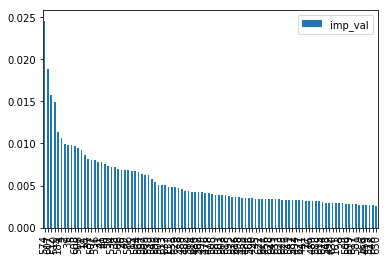

In [21]:
feature_imp[0:100].plot.bar()

In [ ]:
from sklearn import cross_validation
from sklearn import metrics


data_x = master_data_2016[feature_imp['col_name'][0:50].tolist()]
data_y = master_data_2016['FLUVACYR']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.2, random_state=42)

from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Overall Accuracy = %s" %metrics.accuracy_score(y_pred,y_test))
print("Classification Matrix")
print(metrics.classification_report(y_pred,y_test))

In [ ]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=10)

#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import SVC
#clf = OneVsRestClassifier(SVC(kernel="linear"))
#from sklearn.ensemble import RandomForestClassifier
#clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
#from sklearn.naive_bayes import MultinomialNB
#clf = OneVsRestClassifier(MultinomialNB(alpha=0.01))

from sklearn import svm
clf = svm.SVC(kernel="linear")